# Project 8 -- Zeru Zhou

**TA Help:** NA


    
**Collaboration:** NA
    
- get help from Dr. Ward's video

## Question 1

In [1]:
library(data.table)

In [2]:
interactions <- fread("/depot/datamine/data/goodreads/csv/interactions_subset.csv")

In [3]:
# A function that, given a string (userID) and a value (min_rating) returns a value (probability_of_reviewing).
get_probability_of_review <- function(interactions_dataset, userID, min_rating) {
        # Filtering the dataset and keep data that has user_id equals to the given userID. Name the filtered dataset user_data.
        user_data <- subset(interactions_dataset, user_id == userID)

        # Filtering the dataset once more to keep data that has is_read column equals to 1. Name the filtered dataset read_user_data.
        read_user_data <- subset(user_data, is_read == 1)

        # Filtering the dataset once more to keep data that has rating column more than the given min_rating. Name the filtered dataset read_user_min_rating_data.
        read_user_min_rating_data <- subset(read_user_data, rating >= min_rating)

        # Define probability_of_reviewing as the mean of the is_reviewed column in dataset read_user_min_rating_data.
        probability_of_reviewing <- mean(read_user_min_rating_data$is_reviewed)

        # Return the result
        return(probability_of_reviewing)
}

get_probability_of_review(interactions_dataset = interactions, userID = 5000, min_rating = 3)

[1] 0.07079646

This function takes interactions_dataset, userID, and min_rating as inputs, and probability of reviewing as output. It uses userID, and min_rating to filter the dataset, then calculating the mean of is_reviewed column of the filtered dataset. It has 3 arguments: interactions_dataset, userID, and min_rating.

## Question 2

In [4]:
get_probability_of_review <- function(interactions_dataset, userID, min_rating=0) {
        # Filtering the dataset and keep data that has user_id equals to the given userID. Name the filtered dataset user_data.
        user_data <- subset(interactions_dataset, user_id == userID)

        # Filtering the dataset once more to keep data that has is_read column equals to 1. Name the filtered dataset read_user_data.
        read_user_data <- subset(user_data, is_read == 1)

        # Filtering the dataset once more to keep data that has rating column more than the given min_rating. Name the filtered dataset read_user_min_rating_data.
        read_user_min_rating_data <- subset(read_user_data, rating >= min_rating)

        # Define probability_of_reviewing as the mean of the is_reviewed column in dataset read_user_min_rating_data.
        probability_of_reviewing <- mean(read_user_min_rating_data$is_reviewed)

        # Return the result
        return(probability_of_reviewing)
}

In [5]:
get_probability_of_review(interactions_dataset = interactions, userID = 5000)

[1] 0.08163265

In [6]:
get_probability_of_review(userID = 5000,interactions_dataset = interactions)

[1] 0.08163265

In [7]:
get_probability_of_review(interactions, 5000)

[1] 0.08163265

Here is modified: min_rating=0 at the start of the function. 

## Question 3

In [5]:
get_probability_of_review <- function(interactions_dataset, userID, min_rating=0) {
        # Filtering the dataset 
        read_user_min_rating_data <- subset(interactions_dataset, (user_id == userID) & (is_read == 1) & (rating >= min_rating))

        # Define probability_of_reviewing as the mean of the is_reviewed column in dataset read_user_min_rating_data.
        probability_of_reviewing <- mean(read_user_min_rating_data$is_reviewed)

        # Return the result
        return(probability_of_reviewing)
}

In [9]:
get_probability_of_review(interactions, 5000)

[1] 0.08163265

Code is reduced above. Now we only use 1 subset.

## Question 4

In [10]:
head(read_user_min_rating_data)

ERROR: Error in head(read_user_min_rating_data): object 'read_user_min_rating_data' not found


There is an error that there do not exist something called "read_user_min_rating_data", so there comes an error when running head function on it. This is because "read_user_min_rating_data" is an dataset we defined that only make sense inside our "get_probability_of_review" function. That is, it could not be used or detected outside "get_probability_of_review" function, so there is an error when directly use it outside the function "get_probability_of_review".

## Question 5

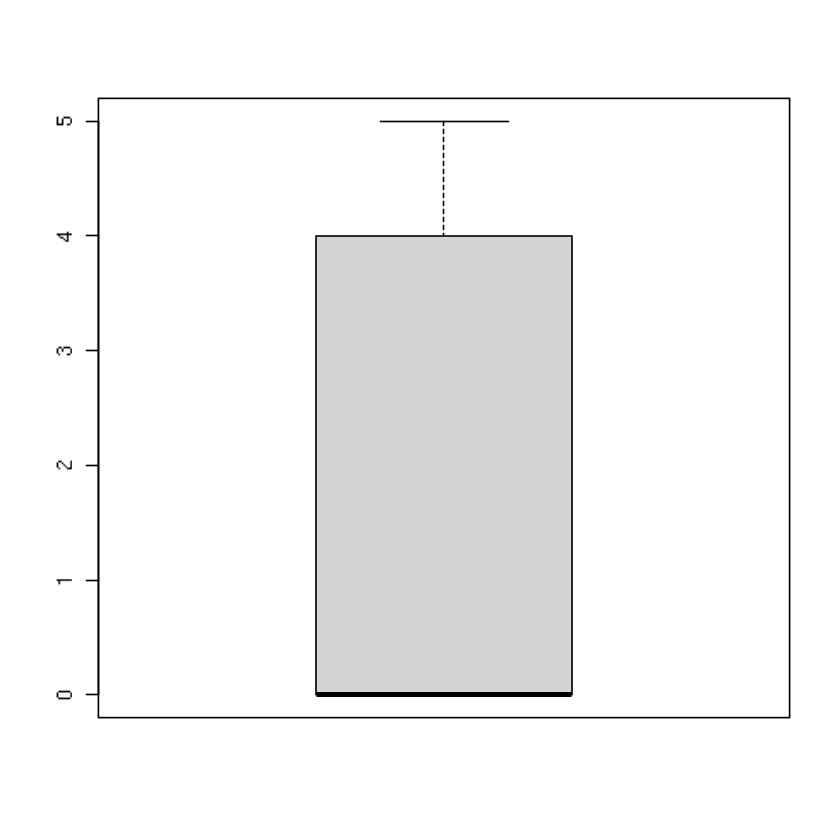

In [16]:
boxplot(interactions$rating)

In [4]:
users <- sample(interactions$user_id, 10)

In [5]:
users

[1] 115826  72191 198769  51969 141041  89743 102417  56922 133891  71596

In [10]:
prob_review <- sapply(users, function(m) get_probability_of_review(interactions_dataset=interactions, userID=m, min_rating=0))

In [11]:
prob_review

[1] 0.365384615 0.165584416 0.255952381 0.005813953 0.025917927 0.303225806
 [7] 0.099489796 0.054123711 0.611064260 0.038961039

The results are listed above. I pick 0 as the specific minimum rating value because according to boxplot I drew, there are many data that has rating value of 0. If we choose another number greater than 0 then it should not be called "minimum" rating value.

## Question 6

In [12]:
prob_review1 <- sapply(users, function(m) get_probability_of_review(interactions_dataset=interactions, userID=m, min_rating=1))

In [13]:
prob_review1

[1] 0.428571429 0.168316832 0.260869565 0.005882353 0.027210884 0.350746269
 [7] 0.101167315 0.058997050 0.615397689 0.040178571

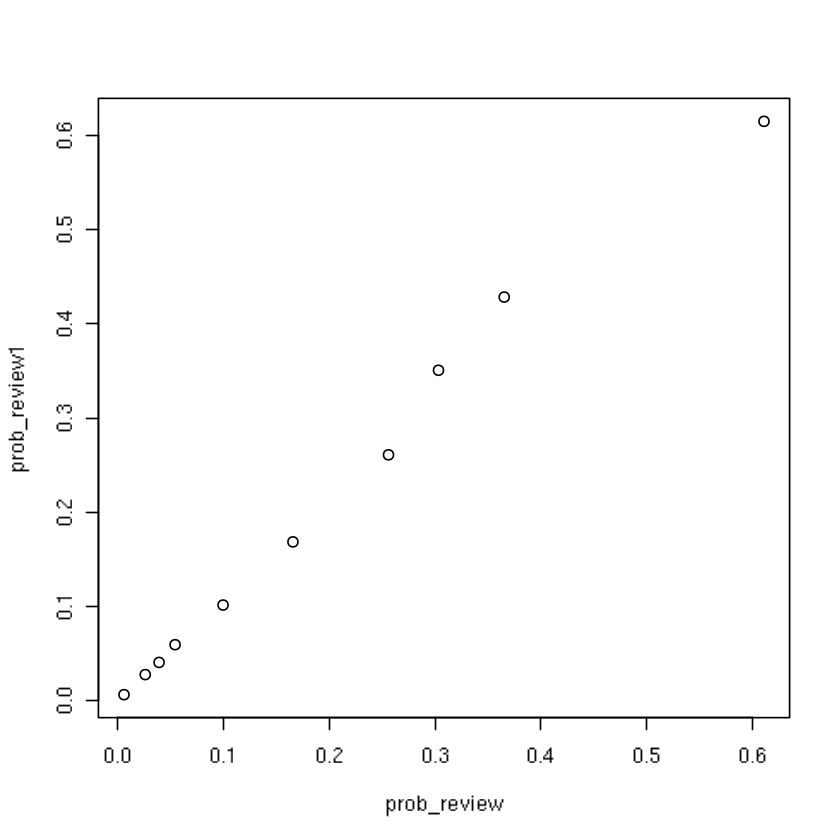

In [14]:
plot(prob_review, prob_review1)

For each of the 10 users, the horizontal axis represents probability when min_rating is 0. The vertical axis represents the probability when min_rating is 1. As we can see, the value of probability is almost the same except for a couple of users with probability between 0.3 and 0.5. Hence, changing the value of min_rating affects the outcome of probability, but maybe slightly as my result above.

## Pledge

By submitting this work I hereby pledge that this is my own, personal work. I've acknowledged in the designated place at the top of this file all sources that I used to complete said work, including but not limited to: online resources, books, and electronic communications. I've noted all collaboration with fellow students and/or TA's. I did not copy or plagiarize another's work.

> As a Boilermaker pursuing academic excellence, I pledge to be honest and true in all that I do. Accountable together – We are Purdue.